### Pytorch - classifier
- CNN을 활용한 모델을 만들어서 CIFAR-10에 대하여 정확도 95% 이상의 Classifier를 만드세요
- 예제 코드는 MNIST에 대한 코드

In [11]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader

torch.manual_seed(0) # seed 고정 - 여러번 실행해도 같은 결과가 나오도록 설정

#### Dataset download

In [12]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)

# CIFAR10
# train_data = datasets.CIFAR10(
#     root = 'data',
#     train = True,                         
#     transform = ToTensor(), 
#     download = True,            
# )
# dataloader_train = DataLoader(train_data, 
#                               batch_size=16, 
#                               shuffle=True)


#### Check images

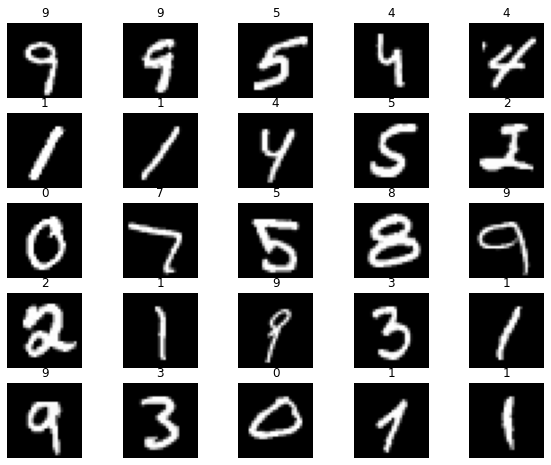

Data shape: torch.Size([1, 28, 28])
torch.Size([28, 28])


In [13]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print('Data shape:', img.shape)
print(img.squeeze().shape)

#### CNN

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output   # return x for visualization

#### Train

In [39]:
images.shape

torch.Size([16, 1, 28, 28])

In [17]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

In [18]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        output = cnn(images)           
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 500 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))

Epoch [1/5], Step [500], Loss: 0.2664
Epoch [1/5], Step [1000], Loss: 0.3986
Epoch [1/5], Step [1500], Loss: 0.0142
Epoch [1/5], Step [2000], Loss: 0.0552
Epoch [1/5], Step [2500], Loss: 0.4234
Epoch [1/5], Step [3000], Loss: 0.1662
Epoch [1/5], Step [3500], Loss: 0.1315
Epoch [2/5], Step [500], Loss: 0.3758
Epoch [2/5], Step [1000], Loss: 0.2494
Epoch [2/5], Step [1500], Loss: 0.0658
Epoch [2/5], Step [2000], Loss: 0.0926
Epoch [2/5], Step [2500], Loss: 0.0711
Epoch [2/5], Step [3000], Loss: 0.0331
Epoch [2/5], Step [3500], Loss: 0.4205
Epoch [3/5], Step [500], Loss: 0.0202
Epoch [3/5], Step [1000], Loss: 0.0071
Epoch [3/5], Step [1500], Loss: 0.1011
Epoch [3/5], Step [2000], Loss: 0.0003
Epoch [3/5], Step [2500], Loss: 0.1033
Epoch [3/5], Step [3000], Loss: 0.0086
Epoch [3/5], Step [3500], Loss: 0.0196
Epoch [4/5], Step [500], Loss: 0.0002
Epoch [4/5], Step [1000], Loss: 0.1102
Epoch [4/5], Step [1500], Loss: 0.3229
Epoch [4/5], Step [2000], Loss: 0.0068
Epoch [4/5], Step [2500], Los

#### Test

In [19]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        test_output = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
        correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
        total += labels.size(0) 
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 97.48 Percent


In [38]:
pred_y = torch.max(test_output, 1)[1].data.squeeze()
print(pred_y)
print(labels)

(pred_y == labels).sum().item()
labels.size(0)

tensor([6, 2, 2, 0, 3, 1, 6, 1, 2, 2, 0, 5, 6, 7, 8, 6])
tensor([6, 2, 2, 0, 3, 1, 6, 1, 2, 2, 6, 5, 6, 7, 8, 6])


16